In [1]:
import pandas as pd
import numpy as np
import itertools 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv(r"C:\Users\HOME\Desktop\Intern\tweets.csv")

df.shape
df.tail()

C:\Users\HOME\AppData\Local\Temp\ipykernel_7552\667862441.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\HOME\Desktop\Intern\tweets.csv")


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
399851,2022-03-27 23:59:26+00:00,1508232258037112834,Russia’s mass media and telecommunications wat...,RenKeNews,https://twitter.com/RenKeNews/status/150823225...,https://twitter.com/RenKeNews,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj'],1.0,0.0,6.0,0,1508232258037112834,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0
399852,2022-03-27 23:59:27+00:00,1508232263930105861,@tony07653102 @CNEWS Pour comprendre un confli...,philmarso,https://twitter.com/philmarso/status/150823226...,https://twitter.com/philmarso,NaN,NaN,0.0,0.0,1.0,0,1508135128706560000,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='CNEWS', id=18396319, displayna...",['#Ukraine'],1.0
399853,2022-03-27 23:59:34+00:00,1508232290413219841,"Putin ukrajinske vojnike naziva neonacizmom, a...",dicke5,https://twitter.com/dicke5/status/150823229041...,https://twitter.com/dicke5,NaN,NaN,0.0,0.0,0.0,0,1508232290413219841,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Putin,', '#Ukrajina,', '#Zelenskij']",3.0
399854,2022-03-27 23:59:44+00:00,1508232332289126401,"Watch: amid war ruins in #Ukraine, unbowed cla...",vsdawson_MUFC,https://twitter.com/vsdawson_MUFC/status/15082...,https://twitter.com/vsdawson_MUFC,['https://www.thestar.com.my/lifestyle/culture...,['https://t.co/qPGVgr6li1'],0.0,0.0,0.0,0,1508232332289126401,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Ukraine,']",1.0
399855,2022-03-27 23:59:45+00:00,1508232337229852679,#britishsummertime started on Sunday 27th.\n\n...,satillus,https://twitter.com/satillus/status/1508232337...,https://twitter.com/satillus,['https://www.instagram.com/p/CboGg_GIcYI/?utm...,['https://t.co/HJfZUrhOMl'],0.0,0.0,0.0,0,1508232337229852679,en,"<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,NaN,"['#britishsummertime', '#clocksgoforward', '#g...",12.0


In [3]:
df['Label'] = np.where(df['ReplyCount'] == 0, 'fake', 'true')

# Save the DataFrame to a new CSV file
df.to_csv(r"C:\Users\HOME\Desktop\Intern\updated_tweets.csv", index=False)

In [4]:
# Display the updated DataF
df.tail()

,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,...,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts,Label
399851,2022-03-27 23:59:26+00:00,1508232258037112834,Russia’s mass media and telecommunications wat...,RenKeNews,https://twitter.com/RenKeNews/status/150823225...,https://twitter.com/RenKeNews,['https://tass.com/world/1428013'],['https://t.co/6Ukollhqfj'],1.0,0.0,...,0,1508232258037112834,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,NaN,"['#RussiaUkraineWar', '#Russia', '#Ukraine']",3.0,true
399852,2022-03-27 23:59:27+00:00,1508232263930105861,@tony07653102 @CNEWS Pour comprendre un confli...,philmarso,https://twitter.com/philmarso/status/150823226...,https://twitter.com/philmarso,NaN,NaN,0.0,0.0,...,0,1508135128706560000,fr,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,"[User(username='CNEWS', id=18396319, displayna...",['#Ukraine'],1.0,fake
399853,2022-03-27 23:59:34+00:00,1508232290413219841,"Putin ukrajinske vojnike naziva neonacizmom, a...",dicke5,https://twitter.com/dicke5/status/150823229041...,https://twitter.com/dicke5,NaN,NaN,0.0,0.0,...,0,1508232290413219841,und,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Putin,', '#Ukrajina,', '#Zelenskij']",3.0,fake
399854,2022-03-27 23:59:44+00:00,1508232332289126401,"Watch: amid war ruins in #Ukraine, unbowed cla...",vsdawson_MUFC,https://twitter.com/vsdawson_MUFC/status/15082...,https://twitter.com/vsdawson_MUFC,['https://www.thestar.com.my/lifestyle/culture...,['https://t.co/qPGVgr6li1'],0.0,0.0,...,0,1508232332289126401,en,"<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,"['#Ukraine,']",1.0,fake
399855,2022-03-27 23:59:45+00:00,1508232337229852679,#britishsummertime started on Sunday 27th.\n\n...,satillus,https://twitter.com/satillus/status/1508232337...,https://twitter.com/satillus,['https://www.instagram.com/p/CboGg_GIcYI/?utm...,['https://t.co/HJfZUrhOMl'],0.0,0.0,...,0,1508232337229852679,en,"<a href=""http://instagram.com"" rel=""nofollow"">...",NaN,NaN,NaN,"['#britishsummertime', '#clocksgoforward', '#g...",12.0,fake


## News True or Fake Determining

In [5]:
news_df = df["Label"]
print(news_df)

0         true
1         true
2         true
3         true
4         true
          ... 
399851    true
399852    fake
399853    fake
399854    fake
399855    fake
Name: Label, Length: 399856, dtype: object


## N-grams 

#### Uni-gram

In [6]:


def ngrams_from_column(csv_file, column_name, n=2):
    df = pd.read_csv(csv_file)
    text_column = df[column_name].astype(str)
    
    unigrams = []
    for row in text_column:
        words = row.split()
        for i in range(len(words) - n + 1):
            unigrams.append(' '.join(words[i:i+n]))
    
    df_unigrams = pd.DataFrame({'Unigrams': unigrams})
    df_unigrams.to_csv('unigrams.csv', index=False)

# Example usage
csv_file_path = r"C:\Users\HOME\Desktop\Intern\updated_tweets.csv"
column_to_extract = "Text"  # Replace with the actual column name
ngrams_from_column(csv_file_path, column_to_extract, n=1)
#print(list(unigram_generator))


C:\Users\HOME\AppData\Local\Temp\ipykernel_7552\3560728462.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


#### Bi-grams

In [7]:
def ngrams_from_column(csv_file, column_name, n=2):
    df = pd.read_csv(csv_file)
    text_column = df[column_name].astype(str)
    
    bigrams = []
    for row in text_column:
        words = row.split()
        for i in range(len(words) - n + 1):
            bigrams.append(' '.join(words[i:i+n]))
    
    df_bigrams = pd.DataFrame({'bigrams': bigrams})
    df_bigrams.to_csv('bigrams.csv', index=False)

# Example usage
csv_file_path = r"C:\Users\HOME\Desktop\Intern\updated_tweets.csv"
column_to_extract = "Text"
ngrams_from_column(csv_file_path, column_to_extract, n=2)

C:\Users\HOME\AppData\Local\Temp\ipykernel_7552\3780529750.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


### Tri-gram

In [8]:
def ngrams_from_column(csv_file, column_name, n=3):
    df = pd.read_csv(csv_file)
    text_column = df[column_name].astype(str)
    
    trigrams = []
    for row in text_column:
        words = row.split()
        for i in range(len(words) - n + 1):
            trigrams.append(' '.join(words[i:i+n]))
    
    df_trigrams = pd.DataFrame({'trigrams': trigrams})
    df_trigrams.to_csv('trigrams.csv', index=False)

# Example usage
csv_file_path = r"C:\Users\HOME\Desktop\Intern\updated_tweets.csv"
column_to_extract = "Text"
ngrams_from_column(csv_file_path, column_to_extract, n=3)


C:\Users\HOME\AppData\Local\Temp\ipykernel_7552\3986319971.py:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


### Frequency of Unigrams

In [9]:
from collections import Counter

def write_unigram_frequencies(csv_file_path):
    # Read the CSV file containing unigrams
    df = pd.read_csv(csv_file_path)
    
    # Extract the unigrams column
    unigrams = df['Unigrams']
    
    # Count the frequency of each unigram
    unigram_counts = Counter(unigrams)
    
    # Create a DataFrame from the counts
    df_counts = pd.DataFrame({'Unigram': list(unigram_counts.keys()), 'Frequency': list(unigram_counts.values())})
    
    df_counts = df_counts.sort_values(by='Frequency', ascending=False)
    
    # Write the frequencies to a new CSV file
    df_counts.to_csv('unigram_frequencies.csv', index=False)

# Example usage
csv_file_path = 'unigrams.csv'
write_unigram_frequencies(csv_file_path)

### Frequency of Bigram

In [10]:
def write_bigram_frequencies(csv_file_path):
    # Read the CSV file containing unigrams
    df = pd.read_csv(csv_file_path)
    
    # Extract the unigrams column
    bigrams = df['bigrams']
    
    # Count the frequency of each unigram
    bigram_counts = Counter(bigrams)
    
    # Create a DataFrame from the counts
    df_counts = pd.DataFrame({'bigram': list(bigram_counts.keys()), 'Frequency': list(bigram_counts.values())})
    
    df_counts = df_counts.sort_values(by='Frequency', ascending=False)
    
    # Write the frequencies to a new CSV file
    df_counts.to_csv('bigram_frequencies.csv', index=False)

# Example usage
csv_file_path = 'bigrams.csv'
write_bigram_frequencies(csv_file_path)

### Frequency of Trigram

In [11]:
def write_trigram_frequencies(csv_file_path):
    # Read the CSV file containing unigrams
    df = pd.read_csv(csv_file_path)
    
    # Extract the unigrams column
    trigrams = df['trigrams']
    
    # Count the frequency of each unigram
    trigram_counts = Counter(trigrams)
    
    # Create a DataFrame from the counts
    df_counts = pd.DataFrame({'trigram': list(trigram_counts.keys()), 'Frequency': list(trigram_counts.values())})
    
    df_counts = df_counts.sort_values(by='Frequency', ascending=False)
    
    # Write the frequencies to a new CSV file
    df_counts.to_csv('trigram_frequencies.csv', index=False)

# Example usage
csv_file_path = 'trigrams.csv'
write_trigram_frequencies(csv_file_path)

## Selecting Top 100 frequency char

In [12]:
def select_starting_n_from_file(csv_file_path, n=100):
    # Read the CSV file
    df = pd.read_csv(csv_file_path)
    
    # Select first n entries and drop the 'Frequency' column
    starting_n = df.iloc[:n].drop(columns=['Frequency'], errors='ignore')
    
    return starting_n

# Read and select the starting 100 entries from each file
unigram_starting = select_starting_n_from_file('unigram_frequencies.csv')
bigram_starting = select_starting_n_from_file('bigram_frequencies.csv')
trigram_starting = select_starting_n_from_file('trigram_frequencies.csv')

# Concatenate the starting entries from all files
starting_combined = pd.concat([unigram_starting, bigram_starting, trigram_starting])

# Write the combined starting entries to a new CSV file
starting_combined.to_csv('starting_combined.csv', index=False)


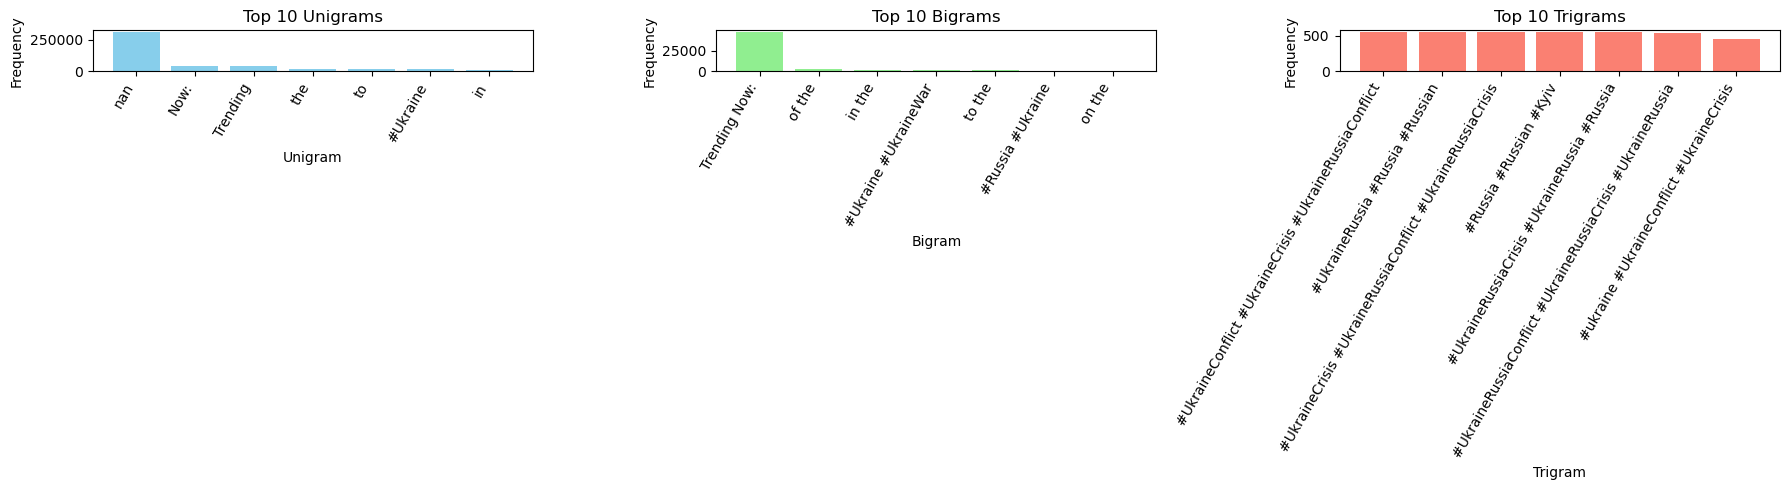

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV files
unigram_freq_df = pd.read_csv('unigram_frequencies.csv')
bigram_freq_df = pd.read_csv('bigram_frequencies.csv')
trigram_freq_df = pd.read_csv('trigram_frequencies.csv')

# Sort data by frequency in descending order
unigram_freq_df = unigram_freq_df.sort_values(by='Frequency', ascending=False)
bigram_freq_df = bigram_freq_df.sort_values(by='Frequency', ascending=False)
trigram_freq_df = trigram_freq_df.sort_values(by='Frequency', ascending=False)

# Select top 5 words from each file
top_unigrams = unigram_freq_df.head(7)
top_bigrams = bigram_freq_df.head(7)
top_trigrams = trigram_freq_df.head(7)

# Plotting
plt.figure(figsize=(18, 5))

# Plot top unigrams
plt.subplot(131)
plt.bar(top_unigrams['Unigram'].astype(str), top_unigrams['Frequency'], color='skyblue')
plt.title('Top 10 Unigrams')
plt.xlabel('Unigram')
plt.ylabel('Frequency')
plt.xticks(rotation=60, ha='right')  # Increase rotation angle and set alignment to right

# Plot top bigrams
plt.subplot(132)
plt.bar(top_bigrams['bigram'].astype(str), top_bigrams['Frequency'], color='lightgreen')
plt.title('Top 10 Bigrams')
plt.xlabel('Bigram')
plt.ylabel('Frequency')
plt.xticks(rotation=60, ha='right')  # Increase rotation angle and set alignment to right

# Plot top trigrams
plt.subplot(133)
plt.bar(top_trigrams['trigram'].astype(str), top_trigrams['Frequency'], color='salmon')
plt.title('Top 10 Trigrams')
plt.xlabel('Trigram')
plt.ylabel('Frequency')
plt.xticks(rotation=60, ha='right')  # Increase rotation angle and set alignment to right

plt.tight_layout()
plt.show()



C:\Users\HOME\AppData\Local\Temp\ipykernel_7552\3381500703.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Unigram'] = df['Unigram'].astype(str)


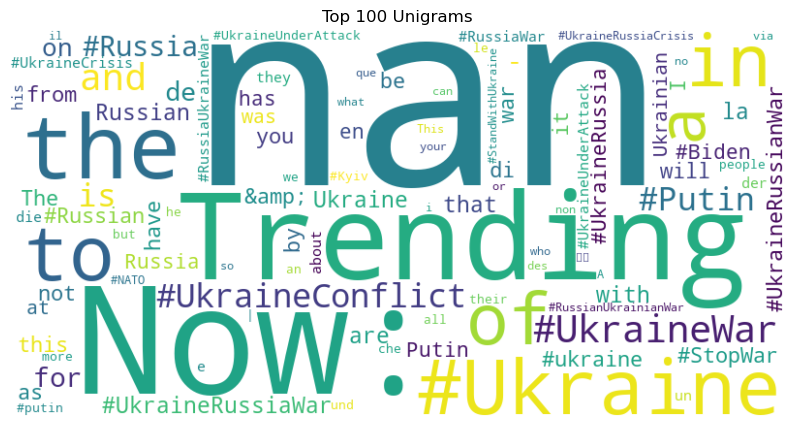

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud from DataFrame
def generate_wordcloud(df, title):
    # Convert 'Unigram' column to strings
    df['Unigram'] = df['Unigram'].astype(str)
    
    # Convert DataFrame to dictionary
    word_freq = dict(zip(df['Unigram'], df['Frequency']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Assuming you have DataFrames for unigrams, bigrams, and trigrams with columns 'Unigram' and 'Frequency'
# Replace 'unigram_freq_df', 'bigram_freq_df', and 'trigram_freq_df' with your actual DataFrames
generate_wordcloud(unigram_freq_df.head(100), 'Top 100 Unigrams')




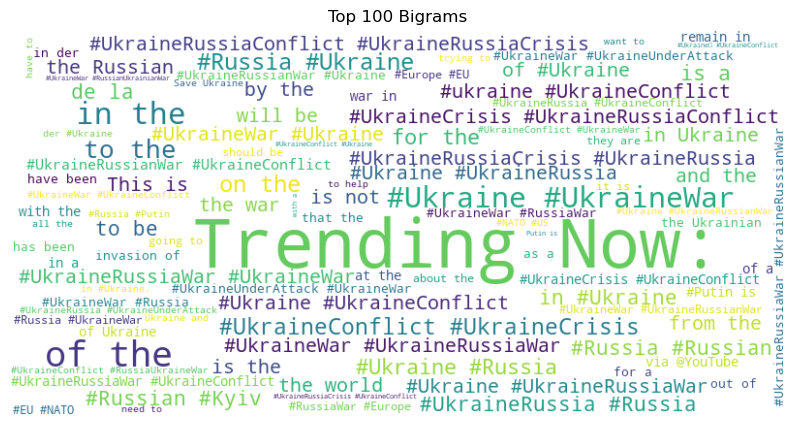

In [15]:
# Function to generate word cloud from DataFrame
def generate_wordcloud(df, title):
    # Convert DataFrame to dictionary
    word_freq = dict(zip(df['bigram'], df['Frequency']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Assuming you have DataFrames for unigrams, bigrams, and trigrams with columns 'Word' and 'Frequency'
# Replace 'unigram_df', 'bigram_df', and 'trigram_df' with your actual DataFrames
generate_wordcloud(bigram_freq_df.head(100), 'Top 100 Bigrams')

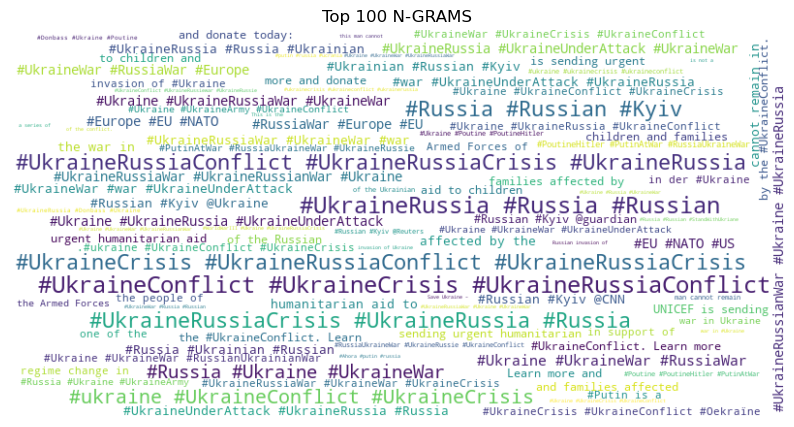

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud from DataFrame
def generate_wordcloud(df, title):
    # Convert DataFrame to dictionary
    word_freq = dict(zip(df['trigram'], df['Frequency']))
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    
    # Plot word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Top 100 N-GRAMS')
    plt.axis('off')
    plt.show()

# Assuming you have DataFrames for unigrams, bigrams, and trigrams with columns 'Word' and 'Frequency'
# Replace 'unigram_df', 'bigram_df', and 'trigram_df' with your actual DataFrames
generate_wordcloud(trigram_freq_df.head(100), 'Top 100 Trigrams')

In [17]:
import pandas as pd

# Step 2: Read CSV Files
unigram_df = pd.read_csv(r'C:\Users\HOME\Desktop\Intern\unigram_frequencies.csv', names=['Word', 'Frequency_unigram'], skiprows=1)
bigram_df = pd.read_csv(r'C:\Users\HOME\Desktop\Intern\bigram_frequencies.csv', names=['Word', 'Frequency_bigram'], skiprows=1)
trigram_df = pd.read_csv(r'C:\Users\HOME\Desktop\Intern\trigram_frequencies.csv', names=['Word', 'Frequency_trigram'], skiprows=1)

# Convert 'Frequency' column to numeric type
unigram_df['Frequency_unigram'] = pd.to_numeric(unigram_df['Frequency_unigram'])
bigram_df['Frequency_bigram'] = pd.to_numeric(bigram_df['Frequency_bigram'])
trigram_df['Frequency_trigram'] = pd.to_numeric(trigram_df['Frequency_trigram'])

# Sort each DataFrame by frequency in descending order
unigram_df = unigram_df.sort_values(by='Frequency_unigram', ascending=False).head(200)
bigram_df = bigram_df.sort_values(by='Frequency_bigram', ascending=False).head(200)
trigram_df = trigram_df.sort_values(by='Frequency_trigram', ascending=False).head(200)

# Merge the DataFrames on the common column (Word)
combined_df = pd.merge(unigram_df, bigram_df, on='Word', how='outer')
combined_df = pd.merge(combined_df, trigram_df, on='Word', how='outer')

# Save the combined DataFrame to a new CSV file with tab-separated values
combined_df.to_csv('combined_freq.csv', sep='\t', index=False)
combined_df.fillna(0, inplace=True)  # Replace NaN with 0


combined_df.head()

,Word,Frequency_unigram,Frequency_bigram,Frequency_trigram
0,!,633.0,0.0,0.0
1,#Ahora #putin #russia,0.0,0.0,75.0
2,#Biden,1919.0,0.0,0.0
3,#Biden #Putin,0.0,196.0,0.0
4,#Donbass #Ukraine #Poutine,0.0,0.0,79.0


In [18]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("C:/Users/HOME/Desktop/Intern/combined_freq.csv", skiprows=1, sep='\t', header=None, names=['Word', 'Frequency_unigram', 'Frequency_bigram', 'Frequency_trigram'])

# Create a new column 'Frequency' with the sum of 'Frequency_unigram', 'Frequency_bigram', and 'Frequency_trigram'
df['Frequency'] = df[['Frequency_unigram', 'Frequency_bigram', 'Frequency_trigram']].sum(axis=1)

# Drop the original frequency columns
df.drop(['Frequency_unigram', 'Frequency_bigram', 'Frequency_trigram'], axis=1, inplace=True)
# Sort the DataFrame by 'Frequency' column in descending order
df = df.sort_values(by='Frequency', ascending=False)

# Reset the index
df = df.reset_index(drop=True)
df.to_csv('final_combined.csv', sep='\t', index=False)

In [19]:
df

,Word,Frequency
0,NaN,308980.0
1,Now:,46834.0
2,Trending,46826.0
3,Trending Now:,46822.0
4,the,21725.0
...,...,...
595,#StopRussianAggression #WarCrimes #CrimesOfWar,47.0
596,#WarCrimes #CrimesOfWar #PutinWarCriminal,47.0
597,Ukraine – #StopWar,47.0
598,Ukraine #ukraine #UkraineConflict,46.0


### Model Building

In [20]:

sentences_df = pd.read_excel(r"C:\Users\HOME\Desktop\Intern\model.xlsx")

def count_matching_words(sentence):
    # Split the sentence into words
    words = sentence.split()
    # Count the number of matching words with 'Word' column in df
    matching_count = sum(1 for word in words if word in df['Word'].values)
    return matching_count

# Count matching words for each sentence and create a new column 'Matching_Word_Count'
sentences_df['Matching_Word_Count'] = sentences_df['Sentence'].apply(count_matching_words)

# Create a new column 'News_Authentic' based on the condition
sentences_df['News_Authentic'] = sentences_df['Matching_Word_Count'] > 10

# Convert boolean values to 'True' or 'False' strings if needed
sentences_df['News_Authentic'] = sentences_df['News_Authentic'].map({True: 'True', False: 'False'})

sentences_df = sentences_df.sort_values(by='Matching_Word_Count', ascending=False)
sentences_df = sentences_df.reset_index(drop=True)
sentences_df.head()

,Sentence,Matching_Word_Count,News_Authentic
0,Russian stock exchange has been suspended as t...,19,True
1,ðŸ‡ºðŸ‡¦ One of the main staging sites of Ukra...,14,True
2,ðŸ‡ºðŸ‡¸ The United States and its allies will...,14,True
3,ðŸ‡ºðŸ‡¦ Russian troops reportedly have landed...,14,True
4,ðŸ‡ºðŸ‡¦ Su-25 flying over Dnipro. over 300 ci...,14,True


In [21]:

# Tokenize the sentences and convert to lowercase
sentences_df['Tokenized_Sentence'] = sentences_df['Sentence'].apply(lambda x: x.lower().split())

# Convert tokenized sentences into bag-of-words representation
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences_df['Tokenized_Sentence'].apply(lambda x: ' '.join(x)))

# Prepare the target variable based on the occurrence of high-frequency words
df['Word'] = df['Word'].str.lower()  # Convert words to lowercase for consistency
threshold = 10000  # Define your threshold for high-frequency words
high_freq_words = set(df.loc[df['Frequency'] > threshold, 'Word'])  # Filter high-frequency words
y = sentences_df['Tokenized_Sentence'].apply(lambda x: any(word in high_freq_words for word in x)).astype(int)


In [22]:
# Step 3: Model Training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Step 4: Model Evaluation

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8


In [23]:
# Step 5: Prediction
# Using the trained model to predict the probability of occurrence of words from df in new sentences

new_sentences_df = pd.read_excel(r"C:\Users\HOME\Desktop\Intern\new_model.xlsx",skiprows=1, header=None, names=['Sentence'])  
new_sentences_df['Tokenized_Sentence'] = new_sentences_df['Sentence'].apply(lambda x: x.lower().split())

# Convert new sentences into bag-of-words representation
new_sentence_vectorized = vectorizer.transform(new_sentences_df['Tokenized_Sentence'].apply(lambda x: ' '.join(x)))


In [24]:
# Predict the probability of occurrence of words from df in the new sentences
probabilities = clf.predict_proba(new_sentence_vectorized)[:, 1]  # Probability of occurrence of words from df
print("Probabilities of occurrence of war:")
print(probabilities.mean())

Probabilities of occurrence of war:
0.9413235780640691


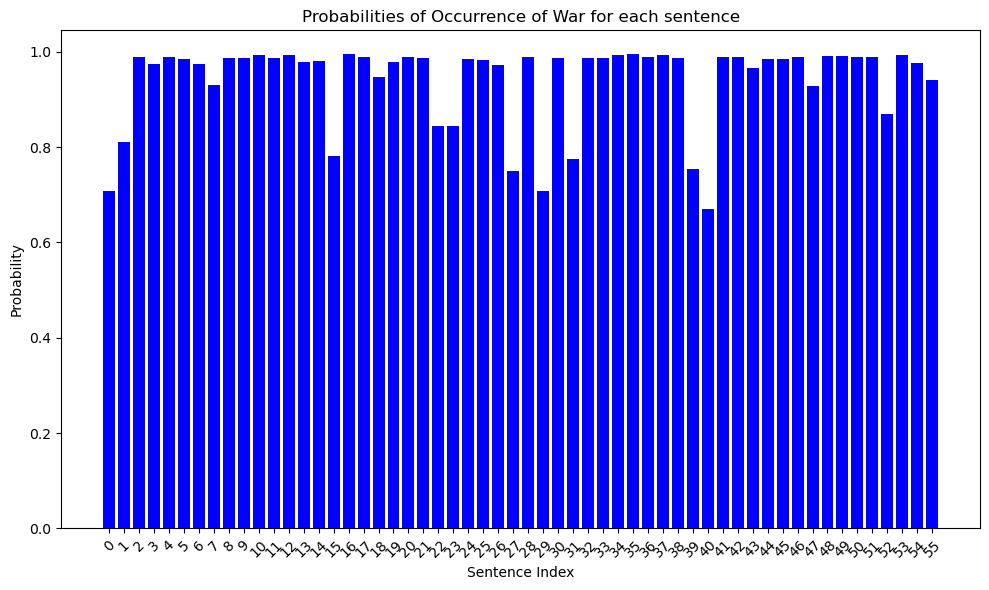

In [25]:

# Plot 
plt.figure(figsize=(10, 6))
plt.bar(range(len(probabilities)),probabilities, color='blue')
plt.xlabel('Sentence Index')
plt.ylabel('Probability')
plt.title('Probabilities of Occurrence of War for each sentence')
plt.xticks(range(len(probabilities)), labels=new_sentences_df.index, rotation=45)
plt.tight_layout()
plt.show()
